In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.stats as ss
import seaborn as sns

sc.settings.set_figure_params(dpi=100)

## Compare HAARVI patients with JAMA score

In [2]:
# read in HAARVI symptoms
# > rows are patient IDs, columns are symptoms
data_ind = pd.read_csv('../../data/HAARVI.PA.symptoms.CELL2023.csv', index_col=0)
data_ind = data_ind.dropna(how='all')
data_ind['n_symps'] = data_ind.sum(1)
# read in JAMA score for HAARVI patients
HAARVI_scores = pd.read_csv('outputs/HAARVI.JAMA_scores.csv', squeeze=True, index_col=0)
# add on JAMA score to the plotting object
data_ind['JAMA_score'] = data_ind.index.map(HAARVI_scores)

PearsonRResult(statistic=0.7097402886540046, pvalue=2.0023747283444213e-28)


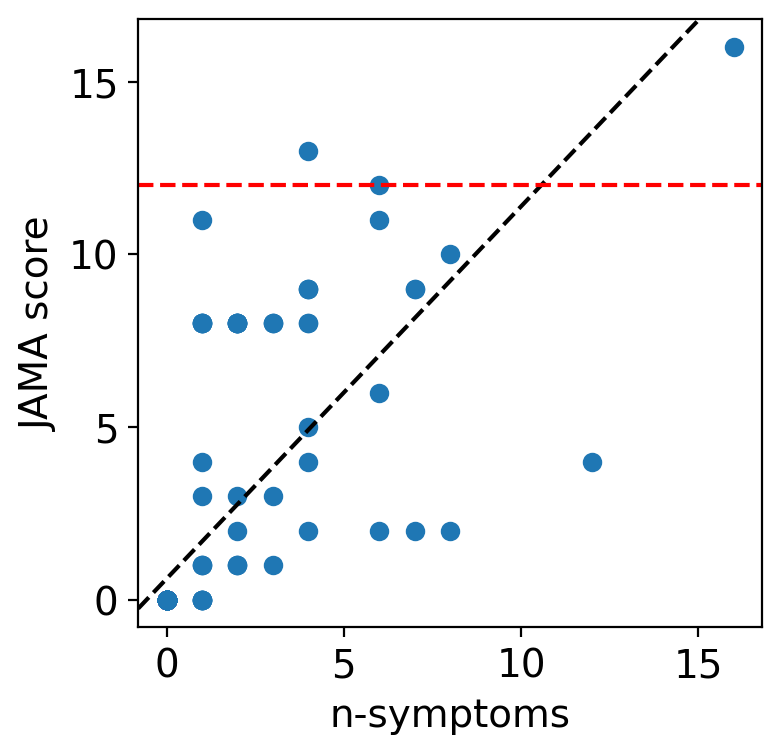

In [3]:
# plot the JAMA score for each group and control
fig, ax = plt.subplots(figsize=[4, 4])
ax.grid(False)
ax.scatter(data_ind['n_symps'], data_ind['JAMA_score'])
# model the line
model = np.polynomial.Polynomial(0)
model = model.fit(data_ind['n_symps'], data_ind['JAMA_score'], 1)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
xl, yl = model.linspace(domain=(xmin, xmax))
ax.plot(xl, yl, color='k', linestyle='--')
ax.plot([xmin, xmax], [12] * 2, color='r', linestyle='--')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set(xlabel='n-symptoms', ylabel='JAMA score')
# print out the pearson correlations for the subsetted and true data
print(ss.pearsonr(data_ind['n_symps'], data_ind['JAMA_score']))

In [4]:
# create the new grouping
data_ind['PASC_status'] = np.nan
data_ind.loc[data_ind['n_symps'] >= 1, 'PASC_status'] = 'PASC+'
data_ind.loc[data_ind['n_symps'] == 0, 'PASC_status'] = 'PASC-'

PASC+ vs. PASC- = 1.3698247115942137e-38


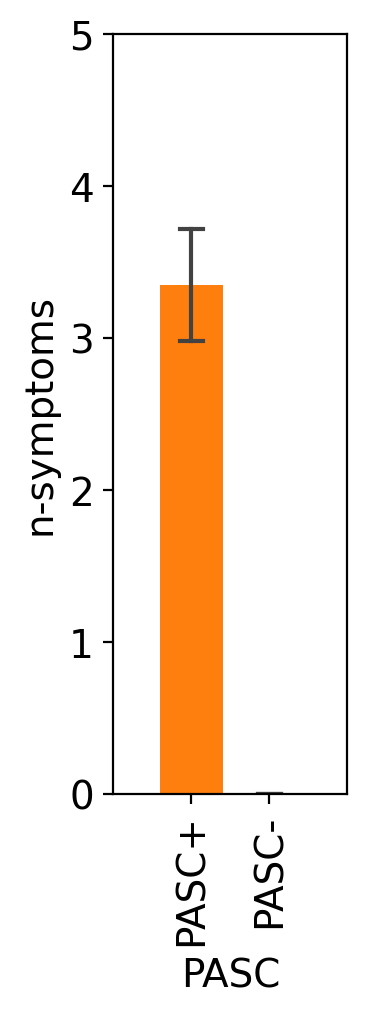

In [5]:
# plot the n-symptoms for each group and control
fig, ax = plt.subplots(figsize=[1.5, 5])
ax.grid(False)
sns.barplot(x='PASC_status', y='n_symps', data=data_ind, ax=ax,
            saturation=1, ci=68, errwidth=1.5, capsize=0.3,
            palette=['tab:orange','tab:blue'], order=['PASC+','PASC-'])
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0, 5)
ax.set_xlim(-1, 2)
ax.set(xlabel='PASC', ylabel='n-symptoms')
# print out p-values
x = data_ind['n_symps'][data_ind['PASC_status'] == 'PASC+']
y = data_ind['n_symps'][data_ind['PASC_status'] == 'PASC-']
u, p = ss.mannwhitneyu(x, y, alternative='two-sided')
print(f'PASC+ vs. PASC- =', p)

PASC+ vs. PASC- = 1.3698247115942137e-38


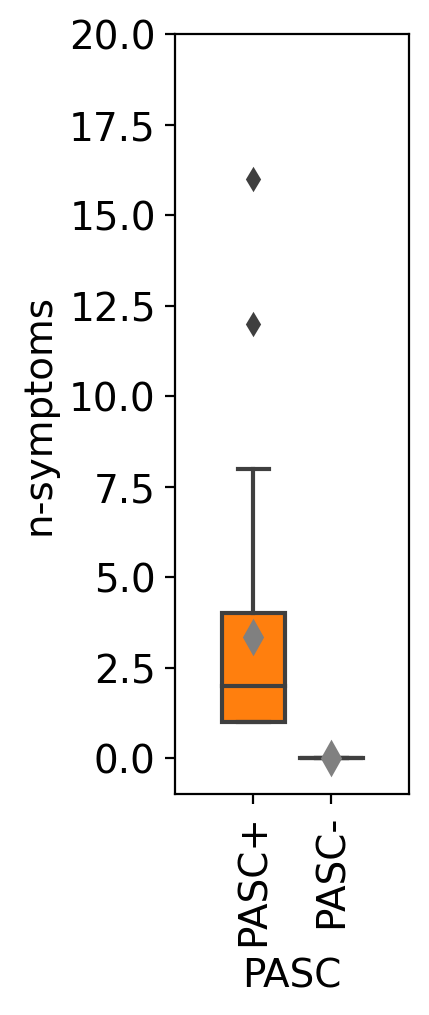

In [6]:
# plot the JAMA score for each group and control
fig, ax = plt.subplots(figsize=[1.5, 5])
ax.grid(False)
sns.boxplot(x='PASC_status', y='n_symps', data=data_ind, ax=ax,
            saturation=1, showmeans=True,
            meanprops={'marker':'d',
                       'markerfacecolor':'grey', 
                       'markeredgecolor':'grey',
                       'markersize':'8'},
            palette=['tab:orange','tab:blue'], order=['PASC+','PASC-'])
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(-1, 20)
ax.set_xlim(-1, 2)
ax.set(xlabel='PASC', ylabel='n-symptoms')
# print out p-values
x = data_ind['n_symps'][data_ind['PASC_status'] == 'PASC+']
y = data_ind['n_symps'][data_ind['PASC_status'] == 'PASC-']
u, p = ss.mannwhitneyu(x, y, alternative='two-sided')
print(f'PASC+ vs. PASC- =', p)

PASC+ vs. PASC- = 2.7595413670088214e-33


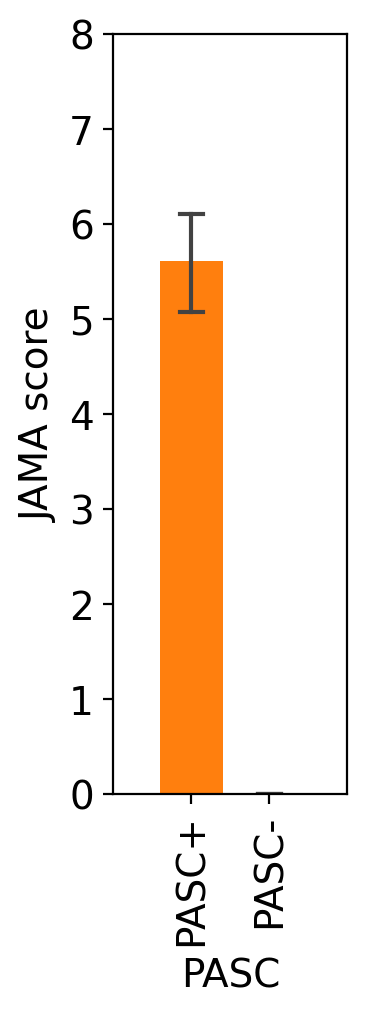

In [7]:
# plot the JAMA score for each group and control
fig, ax = plt.subplots(figsize=[1.5, 5])
ax.grid(False)
sns.barplot(x='PASC_status', y='JAMA_score', data=data_ind, ax=ax,
            saturation=1, ci=68, errwidth=1.5, capsize=0.3,
            palette=['tab:orange','tab:blue'], order=['PASC+','PASC-'])
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0, 8)
ax.set_xlim(-1, 2)
ax.set(xlabel='PASC', ylabel='JAMA score')
xmin, xmax = ax.get_xlim()
ax.plot([xmin, xmax], [12] * 2, color='r', linestyle='--')
ax.set_xlim(xmin, xmax)
# print out p-values
x = data_ind['JAMA_score'][data_ind['PASC_status'] == 'PASC+']
y = data_ind['JAMA_score'][data_ind['PASC_status'] == 'PASC-']
u, p = ss.mannwhitneyu(x, y, alternative='two-sided')
print(f'PASC+ vs. PASC- =', p)

PASC+ vs. PASC- = 2.7595413670088214e-33


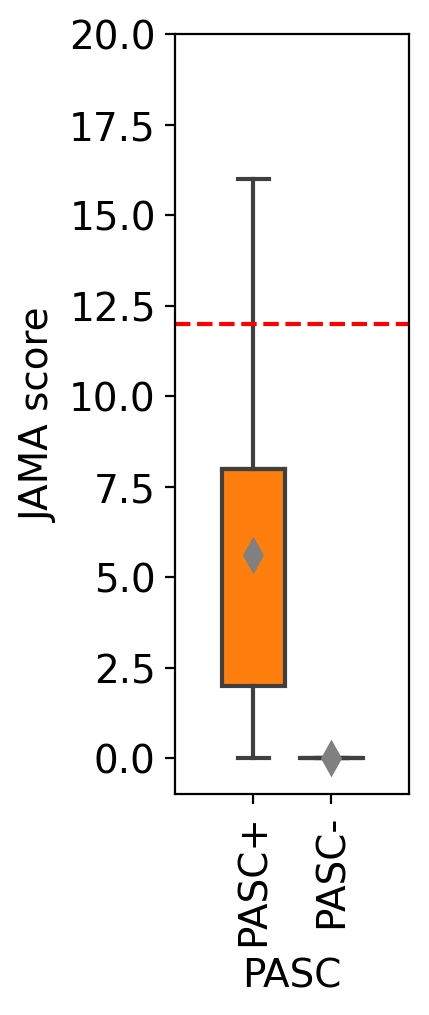

In [8]:
# plot the JAMA score for each group and control
fig, ax = plt.subplots(figsize=[1.5, 5])
ax.grid(False)
sns.boxplot(x='PASC_status', y='JAMA_score', data=data_ind, ax=ax,
            saturation=1, showmeans=True,
            meanprops={'marker':'d',
                       'markerfacecolor':'grey', 
                       'markeredgecolor':'grey',
                       'markersize':'8'},
            palette=['tab:orange','tab:blue'], order=['PASC+','PASC-'])
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(-1, 20)
ax.set_xlim(-1, 2)
ax.set(xlabel='PASC', ylabel='JAMA score')
xmin, xmax = ax.get_xlim()
ax.plot([xmin, xmax], [12] * 2, color='r', linestyle='--')
ax.set_xlim(xmin, xmax)
# print out p-values
x = data_ind['JAMA_score'][data_ind['PASC_status'] == 'PASC+']
y = data_ind['JAMA_score'][data_ind['PASC_status'] == 'PASC-']
u, p = ss.mannwhitneyu(x, y, alternative='two-sided')
print(f'PASC+ vs. PASC- =', p)

<AxesSubplot:>

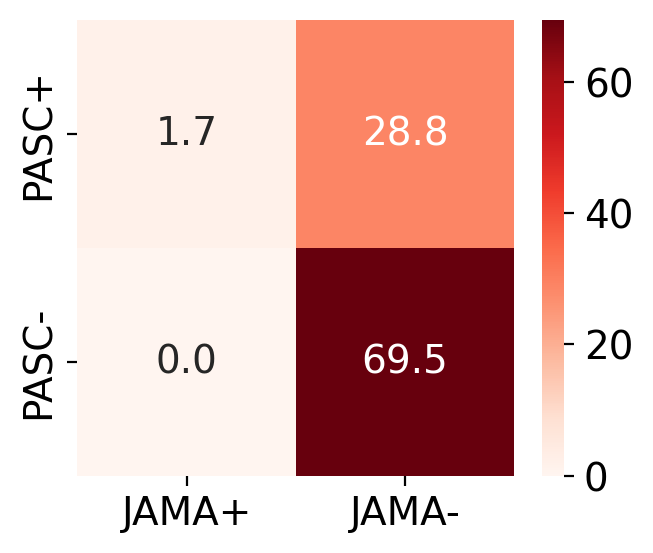

In [9]:
# retrieve data for a heatmap of the percentage of patients that pass this score for each category
plot = pd.DataFrame(index=['PASC+','PASC-'], columns=['JAMA+','JAMA-'])
for idx in plot.index:
    mask = data_ind['PASC_status'] == idx
    mask_p = data_ind.loc[mask, 'JAMA_score'] >= 12
    mask_n = data_ind.loc[mask, 'JAMA_score'] < 12
    plot.loc[idx, 'JAMA+'] = np.sum(mask_p)
    plot.loc[idx, 'JAMA-'] = np.sum(mask_n)
count = plot.copy()
plot /= plot.sum().sum()
# plot the heatmap in question
fig, ax = plt.subplots(figsize=[3.5, 3])
sns.heatmap(plot.astype(float) * 100, annot=True, cmap='Reds', fmt='.1f', ax=ax)

In [10]:
count

,JAMA+,JAMA-
PASC+,3,51
PASC-,0,123


In [11]:
plot

,JAMA+,JAMA-
PASC+,0.016949,0.288136
PASC-,0.0,0.694915


In [12]:
# compute additional statistics
ppv = plot.loc['PASC+','JAMA+'] / plot['JAMA+'].sum()
npv = plot.loc['PASC-','JAMA-'] / plot['JAMA-'].sum()
sensitivity = plot.loc['PASC+','JAMA+'] / plot.loc['PASC+'].sum()
specificity = plot.loc['PASC-','JAMA-'] / plot.loc['PASC-'].sum()
print('PPV =', ppv)
print('NPV =', npv)
print('Sensitivity =', sensitivity)
print('Specificity =', specificity)

PPV = 1.0
NPV = 0.7068965517241379
Sensitivity = 0.05555555555555555
Specificity = 1.0


In [13]:
# check what score gets the most patients
vmax = int(max(data_ind['JAMA_score']) + 1)
plot = pd.DataFrame(columns=['JAMA_score_cutoff','n_PASC+_captured','n_PASC-_captured'])
for x in range(vmax):
    mask = (data_ind['JAMA_score'] >= x) & (~data_ind['PASC_status'].isna())
    n_p = np.sum(data_ind.loc[mask, 'PASC_status'] == 'PASC+')
    n_n = np.sum(data_ind.loc[mask, 'PASC_status'] == 'PASC-')
    plot.loc[plot.shape[0]] = x, n_p, n_n

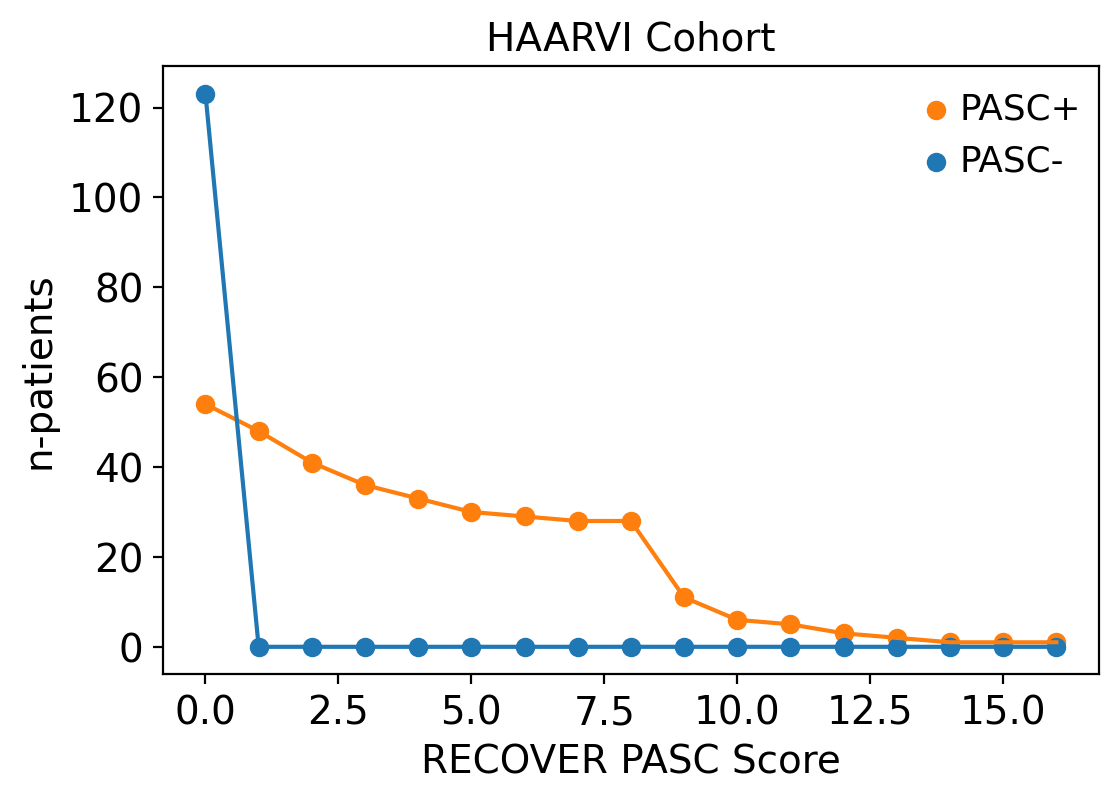

In [14]:
# plot the graph of these values
fig, ax = plt.subplots(figsize=[6, 4])
ax.grid(False)
ax.scatter(plot['JAMA_score_cutoff'], plot['n_PASC+_captured'], color='tab:orange', label='PASC+')
ax.plot(plot['JAMA_score_cutoff'], plot['n_PASC+_captured'], color='tab:orange')
ax.scatter(plot['JAMA_score_cutoff'], plot['n_PASC-_captured'], color='tab:blue', label='PASC-')
ax.plot(plot['JAMA_score_cutoff'], plot['n_PASC-_captured'], color='tab:blue')
ax.set(xlabel='RECOVER PASC Score', ylabel='n-patients', title='HAARVI Cohort')
ax.legend(bbox_to_anchor=(1.015, 1.01), bbox_transform=ax.transAxes,
          loc='upper right', frameon=False)

In [15]:
# compute into percentages
new_cols = ['perc_PASC+_captured','perc_PASC-_captured']
old_cols = ['n_PASC+_captured','n_PASC-_captured']
plot[new_cols] = 100 * plot[old_cols] / sum(~data_ind['PASC_status'].isna())

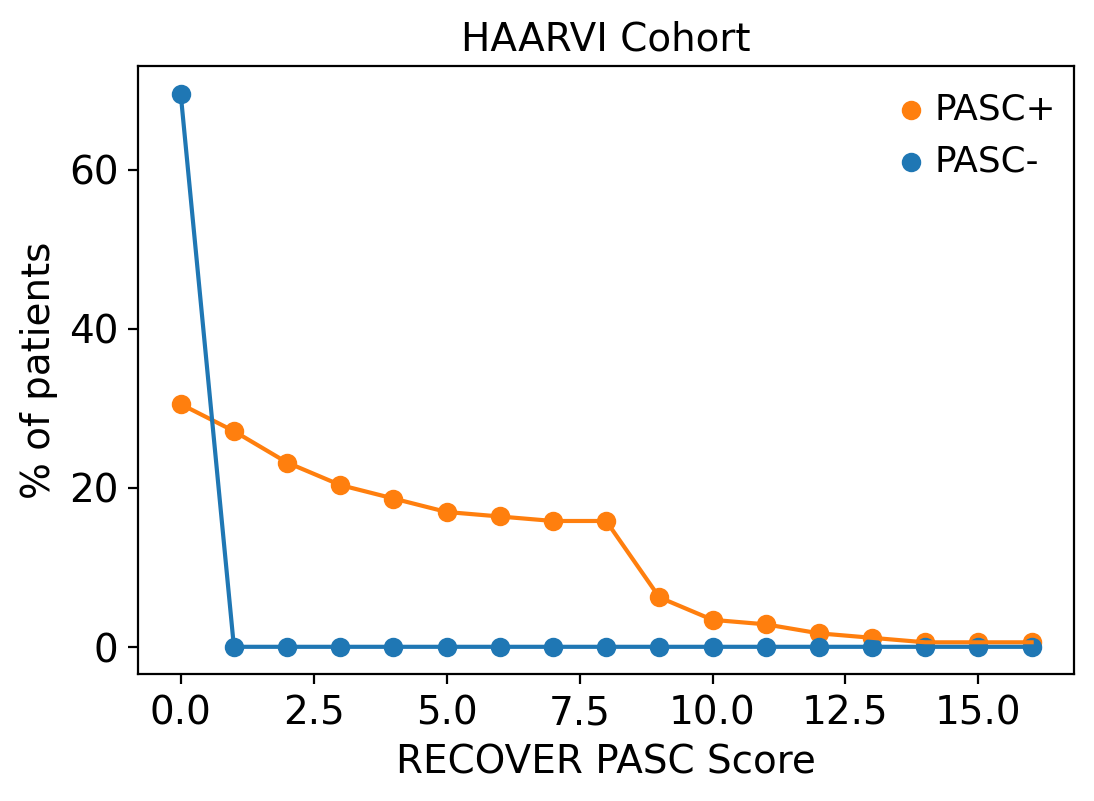

In [16]:
# plot the graph of these values
fig, ax = plt.subplots(figsize=[6, 4])
ax.grid(False)
ax.scatter(plot['JAMA_score_cutoff'], plot['perc_PASC+_captured'], color='tab:orange', label='PASC+')
ax.plot(plot['JAMA_score_cutoff'], plot['perc_PASC+_captured'], color='tab:orange')
ax.scatter(plot['JAMA_score_cutoff'], plot['perc_PASC-_captured'], color='tab:blue', label='PASC-')
ax.plot(plot['JAMA_score_cutoff'], plot['perc_PASC-_captured'], color='tab:blue')
ax.set(xlabel='RECOVER PASC Score', ylabel='% of patients', title='HAARVI Cohort')
ax.legend(bbox_to_anchor=(1.015, 1.01), bbox_transform=ax.transAxes,
          loc='upper right', frameon=False)